## Question 1: Delivery Performance

### Delivery Performance Analysis: Brazilian E-commerce

● What factors most significantly influence delivery performance, and how can delivery performance be improved?

## 1. Introduction

The Brazilian E-commerce Public Dataset by Olist contains information on 100,000 orders from 2016 to 2018 across multiple marketplaces in Brazil. This comprehensive dataset includes order details, product information, customer data, and delivery timestamps, making it ideal for analyzing e-commerce operations. The dataset consists of 9 related CSV files containing various aspects of the e-commerce ecosystem, from customer demographics to product categories and delivery metrics. This analysis focuses on identifying factors influencing delivery performance and proposing strategies for improvement.

## 2. Methodology

### 2.1 Data Preparation

To analyze delivery performance, we need to engineer relevant features from the dataset:

In [21]:
import pandas as pd

orders_df = pd.read_csv('olist_orders_dataset.csv')
orders_df['delivery_time'] = (pd.to_datetime(orders_df['order_delivered_customer_date']) - 
                             pd.to_datetime(orders_df['order_purchase_timestamp'])).dt.days

orders_df['delivery_delay'] = (pd.to_datetime(orders_df['order_delivered_customer_date']) - 
                              pd.to_datetime(orders_df['order_estimated_delivery_date'])).dt.days
orders_df['is_late'] = orders_df['delivery_delay'] > 0
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,-8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,-6.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,-18.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,-13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,-10.0,False
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0,-11.0,False
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0,-2.0,False
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0,-6.0,False
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0,-21.0,False


### 2.2 Feature Engineering

We'll integrate data from multiple tables to create potential predictors:

In [ ]:
from math import radians, sin, cos, sqrt, asin
# Loading the datasets

order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
customers_df = pd.read_csv('olist_customers_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
product_category_translation = pd.read_csv('product_category_name_translation.csv')



delivery_df = pd.merge(orders_df, order_items_df, on='order_id')
delivery_df = pd.merge(delivery_df, products_df, on='product_id')
delivery_df = pd.merge(delivery_df, sellers_df, on='seller_id')

delivery_df = pd.merge(delivery_df, customers_df, on='customer_id')

def calculate_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  
    return c * r

seller_geo = sellers_df.merge(geolocation_df, 
                             left_on='seller_zip_code_prefix', 
                             right_on='geolocation_zip_code_prefix').drop_duplicates('seller_id')
customer_geo = customers_df.merge(geolocation_df, 
                                 left_on='customer_zip_code_prefix', 
                                 right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id')

delivery_df = delivery_df.merge(seller_geo[['seller_id', 'geolocation_lat', 'geolocation_lng']], 
                               on='seller_id', suffixes=('', '_seller'))
delivery_df = delivery_df.merge(customer_geo[['customer_id', 'geolocation_lat', 'geolocation_lng']], 
                               on='customer_id', suffixes=('_seller', '_customer'))

delivery_df['shipping_distance'] = delivery_df.apply(
    lambda row: calculate_distance(
        row['geolocation_lat_seller'], 
        row['geolocation_lng_seller'], 
        row['geolocation_lat_customer'], 
        row['geolocation_lng_customer']
    ), axis=1
)

delivery_df = pd.merge(delivery_df, product_category_translation, on='product_category_name')

delivery_df = pd.merge(delivery_df, payment_df, on='order_id')

### 2.3 Exploratory Analysis
Before modeling, we'll examine relationships between delivery time and potential factors:

Dataset shape: (115313, 42)

Basic statistics for delivery metrics:
       delivery_time  delivery_delay  shipping_distance
count  112835.000000   112835.000000      115313.000000
mean       12.007515      -12.056383         598.203087
std         9.450115       10.161008         590.951441
min         0.000000     -147.000000           0.000000
25%         6.000000      -17.000000         187.737290
50%        10.000000      -13.000000         432.728390
75%        15.000000       -7.000000         792.604898
max       209.000000      188.000000        8736.947618

Missing values in key columns:
delivery_time        2478
delivery_delay       2478
shipping_distance       0
product_weight_g        1
price                   0
dtype: int64


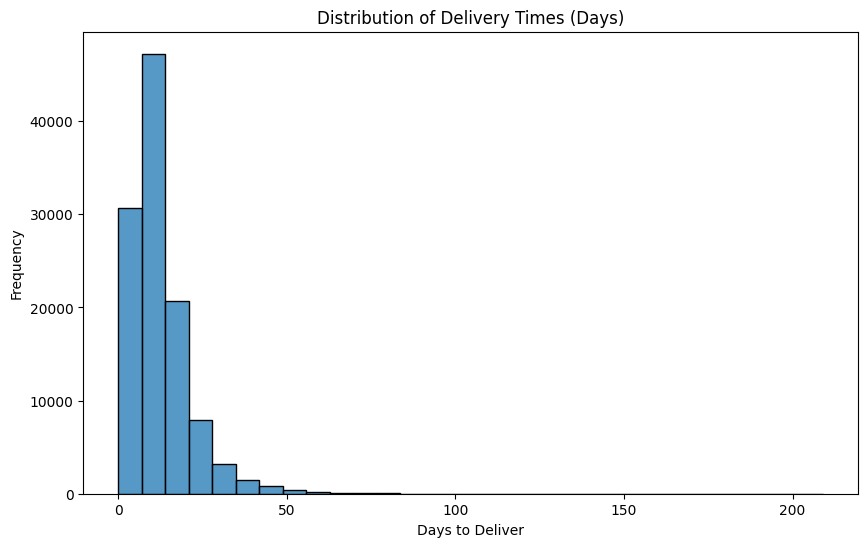


Percentage of late deliveries: 6.383495356117697 %

Correlation with delivery time:
delivery_time        1.000000
shipping_distance    0.390983
freight_value        0.213088
product_weight_g     0.085574
price                0.061421
Name: delivery_time, dtype: float64


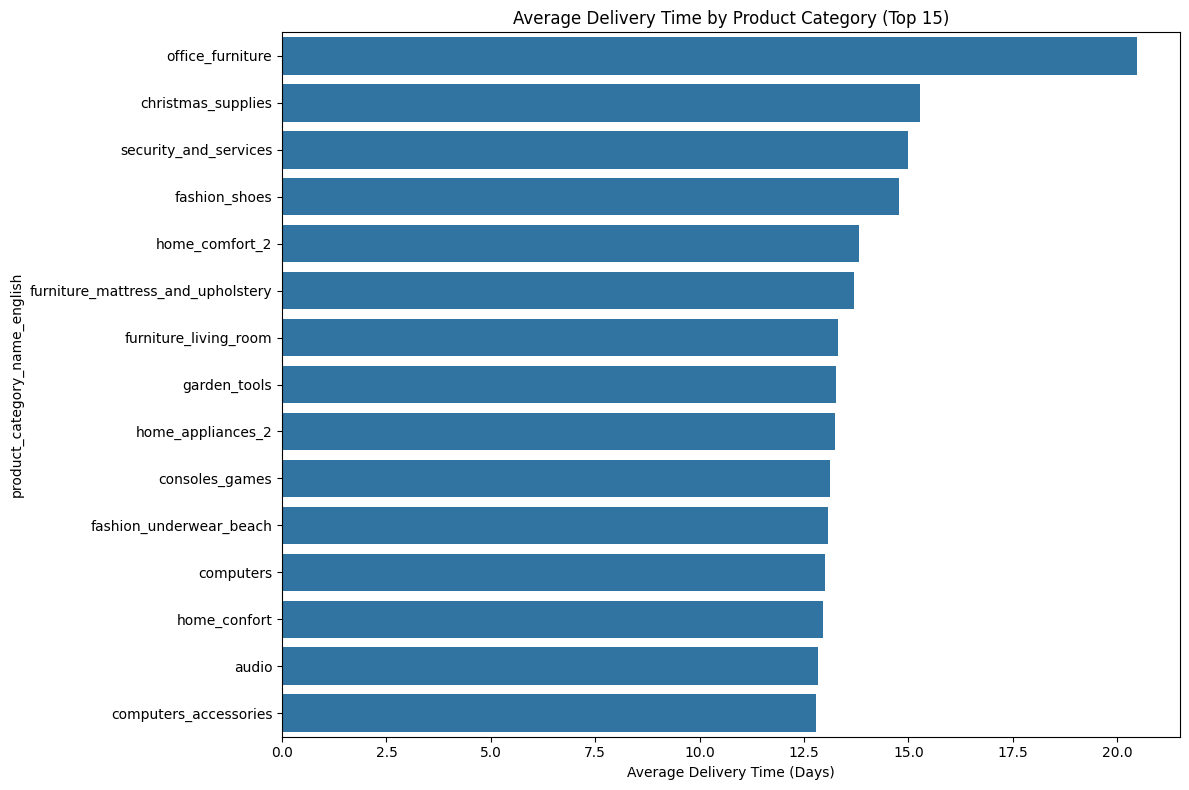

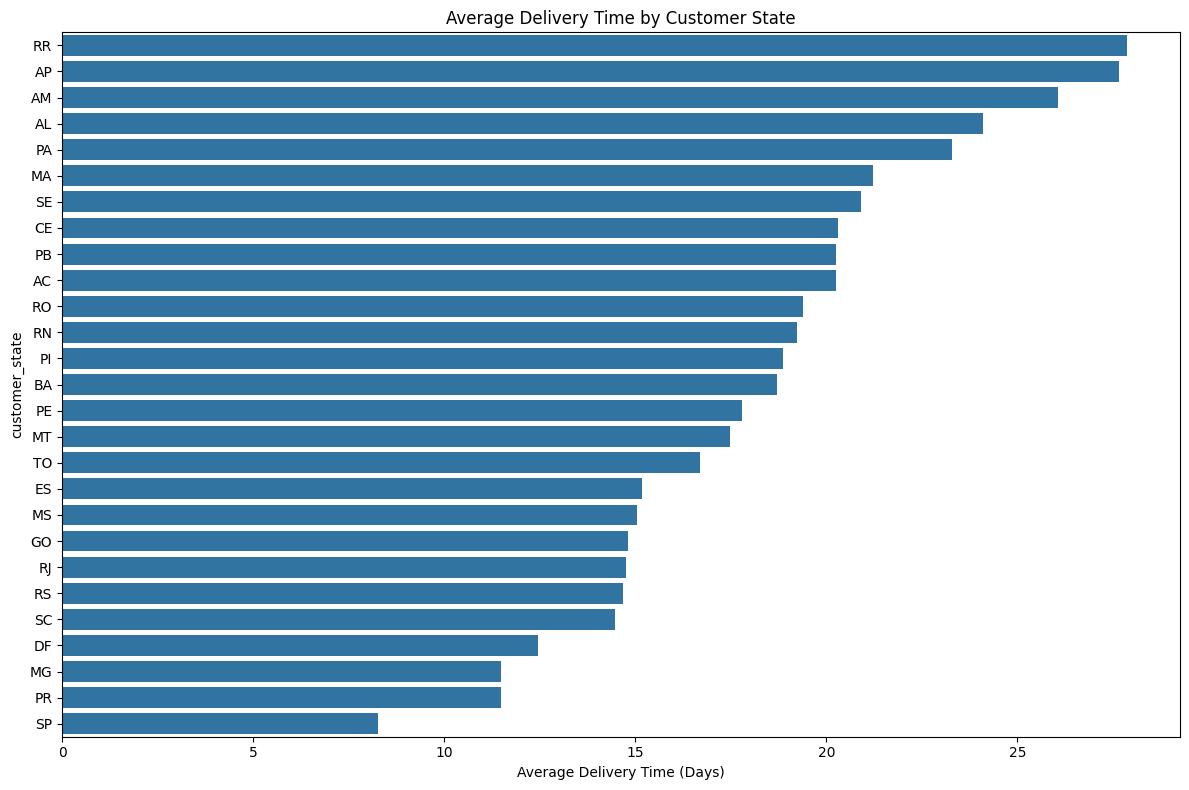

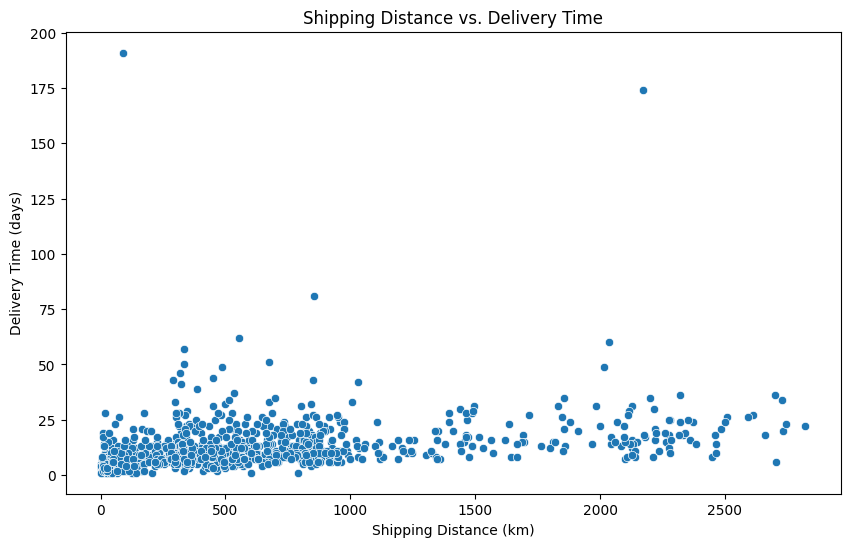

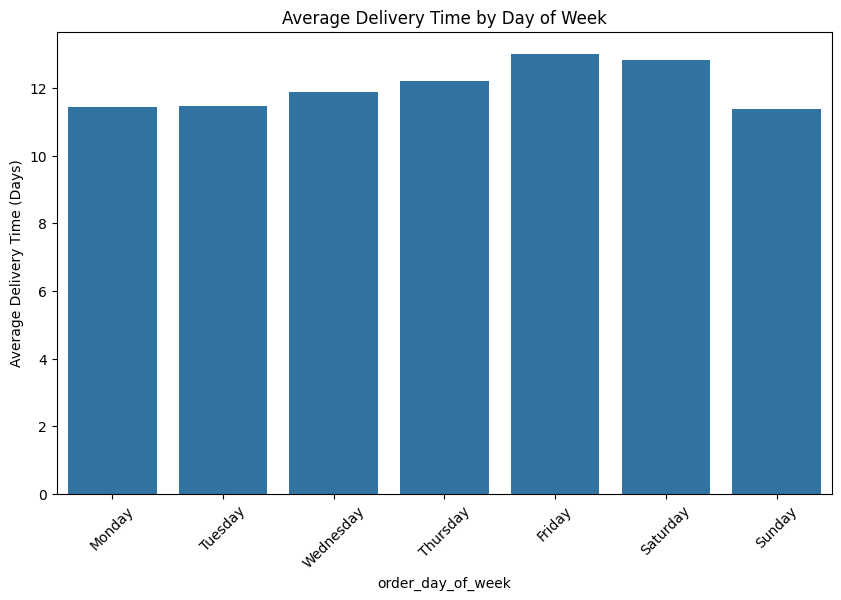


Features for modeling - summary:
       shipping_distance  product_weight_g          price  freight_value  \
count      115313.000000     115312.000000  115313.000000  115313.000000   
mean          598.203087       2115.964071     120.955401      20.068850   
std           590.951441       3780.584319     184.417512      15.884988   
min             0.000000          0.000000       0.850000       0.000000   
25%           187.737290        300.000000      39.900000      13.080000   
50%           432.728390        700.000000      74.900000      16.320000   
75%           792.604898       1800.000000     134.900000      21.220000   
max          8736.947618      40425.000000    6735.000000     409.680000   

       delivery_time  
count  112835.000000  
mean       12.007515  
std         9.450115  
min         0.000000  
25%         6.000000  
50%        10.000000  
75%        15.000000  
max       209.000000  


<Axes: title={'center': 'Distribution of Delivery Times (Days)'}>

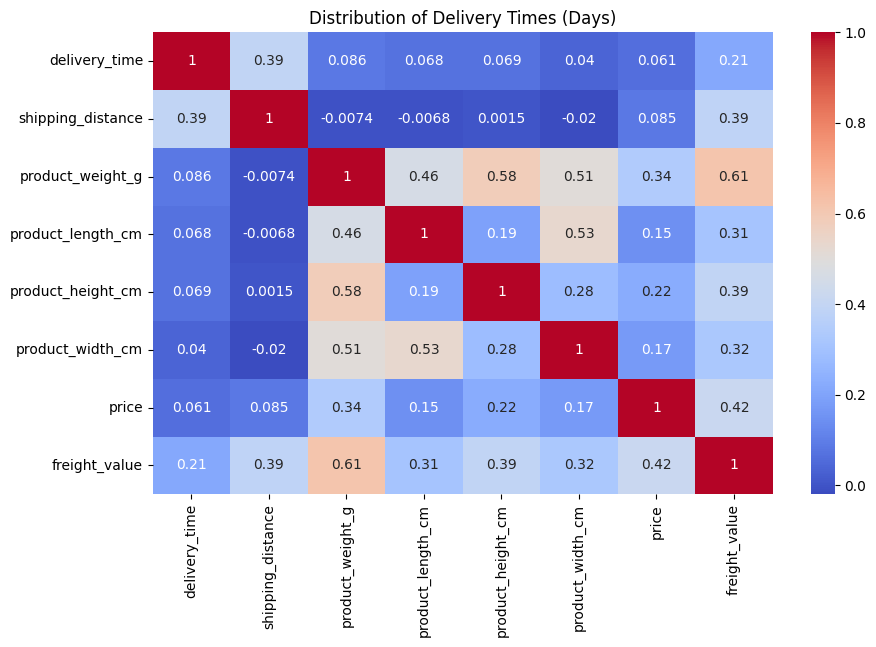

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Dataset shape:", delivery_df.shape)
print("\nBasic statistics for delivery metrics:")
print(delivery_df[['delivery_time', 'delivery_delay', 'shipping_distance']].describe())

print("\nMissing values in key columns:")
print(delivery_df[['delivery_time', 'delivery_delay', 'shipping_distance', 'product_weight_g', 'price']].isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(delivery_df['delivery_time'].dropna(), bins=30)
plt.title('Distribution of Delivery Times (Days)')
plt.xlabel('Days to Deliver')
plt.ylabel('Frequency')
plt.savefig('delivery_time_distribution.png')
plt.show()

print("\nPercentage of late deliveries:", 
      (delivery_df['is_late'].sum() / len(delivery_df)) * 100, "%")

print("\nCorrelation with delivery time:")
corr_cols = ['delivery_time', 'shipping_distance', 'product_weight_g', 'price', 'freight_value']
print(delivery_df[corr_cols].corr()['delivery_time'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
category_delivery = delivery_df.groupby('product_category_name_english')['delivery_time'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=category_delivery.values, y=category_delivery.index)
plt.title('Average Delivery Time by Product Category (Top 15)')
plt.xlabel('Average Delivery Time (Days)')
plt.tight_layout()
plt.savefig('delivery_by_category.png')
plt.show()

plt.figure(figsize=(12, 8))
region_delivery = delivery_df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False)
sns.barplot(x=region_delivery.values, y=region_delivery.index)
plt.title('Average Delivery Time by Customer State')
plt.xlabel('Average Delivery Time (Days)')
plt.tight_layout()
plt.savefig('delivery_by_state.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=delivery_df.sample(1000), x='shipping_distance', y='delivery_time')
plt.title('Shipping Distance vs. Delivery Time')
plt.xlabel('Shipping Distance (km)')
plt.ylabel('Delivery Time (days)')
plt.savefig('distance_vs_time.png')
plt.show()

delivery_df['order_day_of_week'] = pd.to_datetime(delivery_df['order_purchase_timestamp']).dt.day_name()
plt.figure(figsize=(10, 6))
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_delivery = delivery_df.groupby('order_day_of_week')['delivery_time'].mean()
dow_delivery = dow_delivery.reindex(dow_order)
sns.barplot(x=dow_delivery.index, y=dow_delivery.values)
plt.title('Average Delivery Time by Day of Week')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.savefig('delivery_by_weekday.png')
plt.show()

print("\nFeatures for modeling - summary:")
modeling_features = ['shipping_distance', 'product_weight_g', 'price', 
                    'freight_value', 'delivery_time']
print(delivery_df[modeling_features].describe())

plt.figure(figsize=(10, 6))
sns.histplot(orders_df['delivery_time'].dropna(), bins=30)
plt.title('Distribution of Delivery Times (Days)')
plt.xlabel('Days to Deliver')
plt.ylabel('Frequency')

correlation_matrix = delivery_df[['delivery_time', 'shipping_distance', 'product_weight_g', 
                                'product_length_cm', 'product_height_cm', 'product_width_cm', 
                                'price', 'freight_value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### 2.4 Predictive Modeling
We'll implement multiple models to identify key factors:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

delivery_df['product_volume_cm3'] = delivery_df['product_length_cm'] * delivery_df['product_height_cm'] * delivery_df['product_width_cm']

delivery_df['order_purchase_datetime'] = pd.to_datetime(delivery_df['order_purchase_timestamp'])
# Adding engineered features like 'day_of_week' and 'seller_days_since_first_sale' for use in predictive modeling
delivery_df['day_of_week'] = delivery_df['order_purchase_datetime'].dt.dayofweek
delivery_df['month'] = delivery_df['order_purchase_datetime'].dt.month

seller_first_sale = delivery_df.groupby('seller_id')['order_purchase_datetime'].min().reset_index()
seller_first_sale.columns = ['seller_id', 'first_sale_date']
delivery_df = pd.merge(delivery_df, seller_first_sale, on='seller_id', how='left')
delivery_df['seller_days_since_first_sale'] = (delivery_df['order_purchase_datetime'] - delivery_df['first_sale_date']).dt.days

if 'product_category_english' not in delivery_df.columns:
    if 'product_category_name_english' in delivery_df.columns:
        delivery_df['product_category_english'] = delivery_df['product_category_name_english']
    else:
        delivery_df = pd.merge(
            delivery_df,
            product_category_translation.rename(columns={'product_category_name_english': 'product_category_english'}),
            on='product_category_name',
            how='left'
        )

for feature in features:
    if feature in delivery_df.columns and delivery_df[feature].isnull().sum() > 0:
        if delivery_df[feature].dtype.kind in 'ifc':  # If numeric
            delivery_df[feature].fillna(delivery_df[feature].median(), inplace=True)
        else:  # If categorical
            delivery_df[feature].fillna(delivery_df[feature].mode()[0], inplace=True)

features = ['shipping_distance', 'product_weight_g', 'product_volume_cm3', 
           'price', 'freight_value', 'payment_installments', 'seller_days_since_first_sale',
           'day_of_week', 'month', 'product_category_english']

delivery_df_clean = delivery_df.dropna(subset=features + ['delivery_time'])

X = pd.get_dummies(delivery_df_clean[features], drop_first=True)
y = delivery_df_clean['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
feature_importance = {}
# Training and evaluating three regression models (Linear, Random Forest, Gradient Boosting) and comparing performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    
    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = pd.Series(
            model.feature_importances_, index=X.columns
        ).sort_values(ascending=False)

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16340\3323755723.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivery_df[feature].fillna(delivery_df[feature].median(), inplace=True)
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16340\3323755723.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

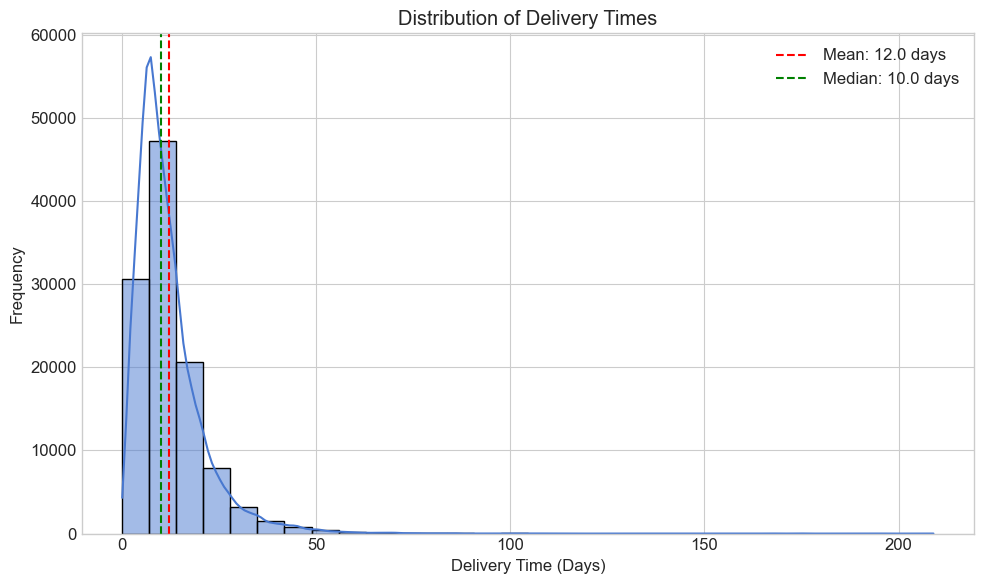

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16340\1730403030.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_delivery = delivery_df.groupby('distance_bucket')['delivery_time'].mean()


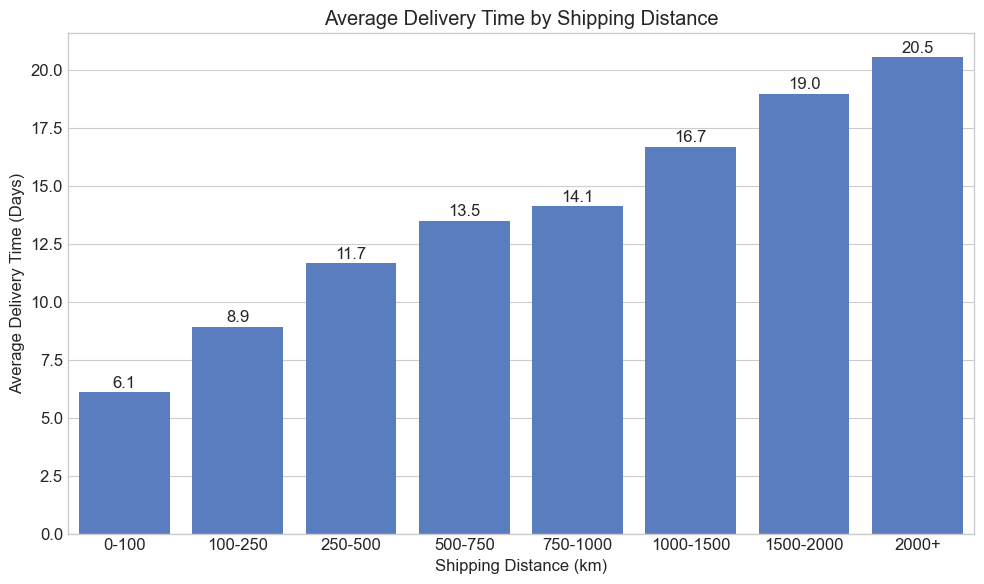

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16340\1730403030.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_delivery = delivery_df.groupby('weight_bucket')['delivery_time'].mean()


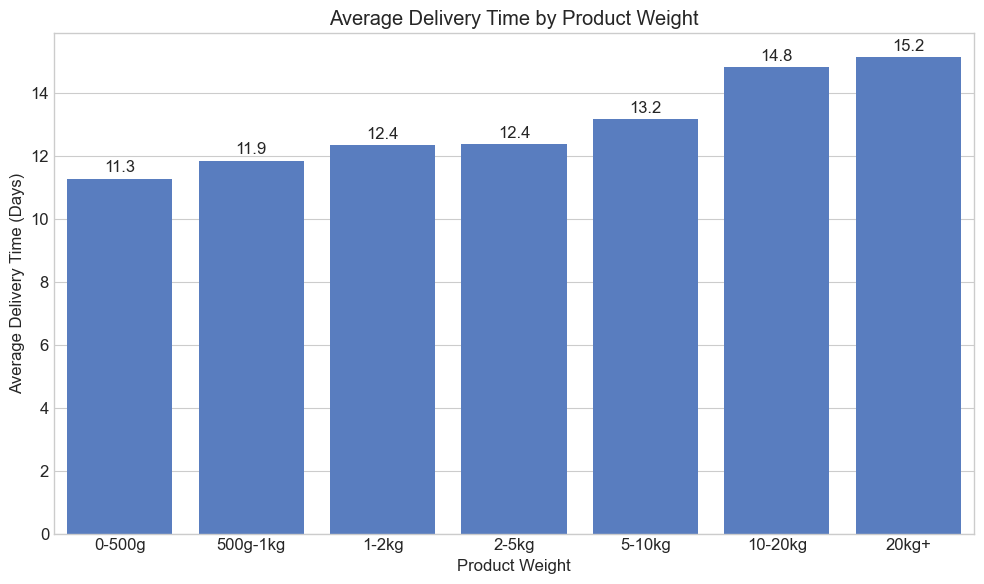

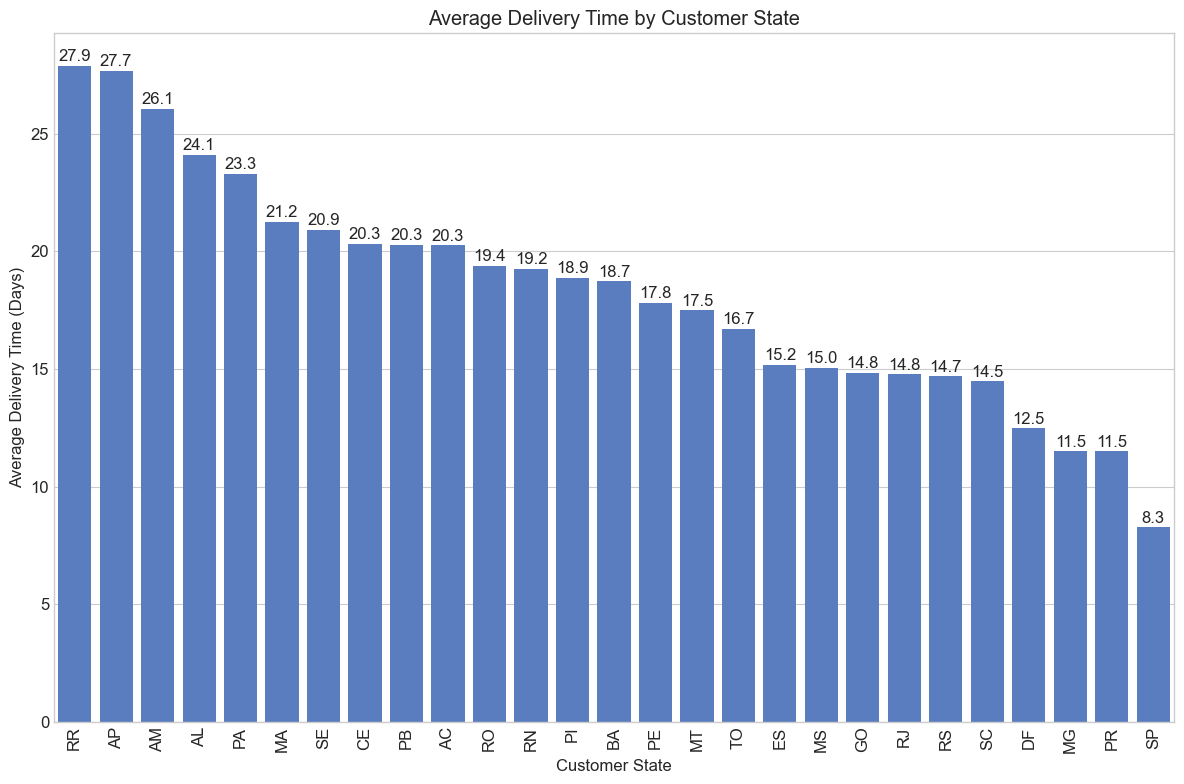

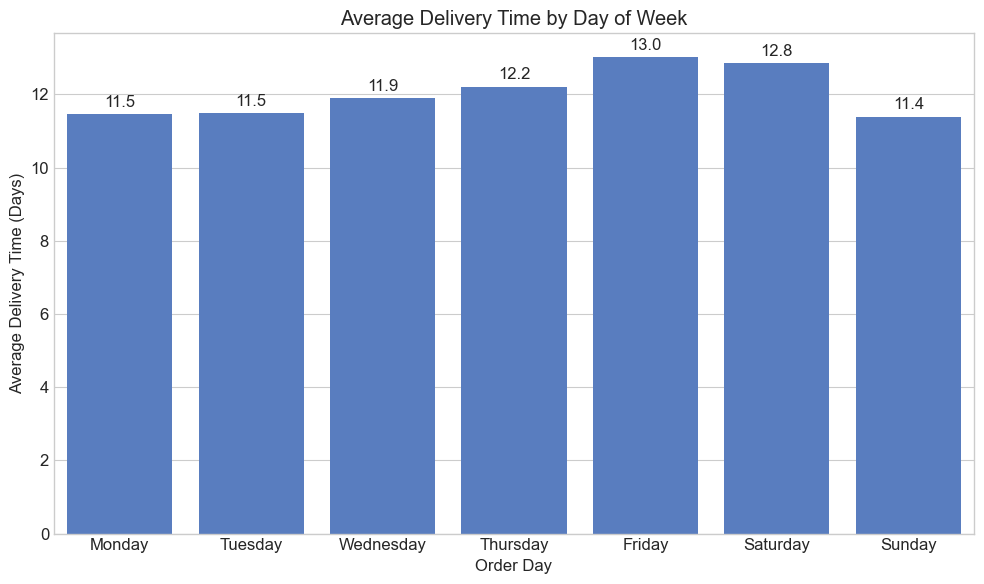

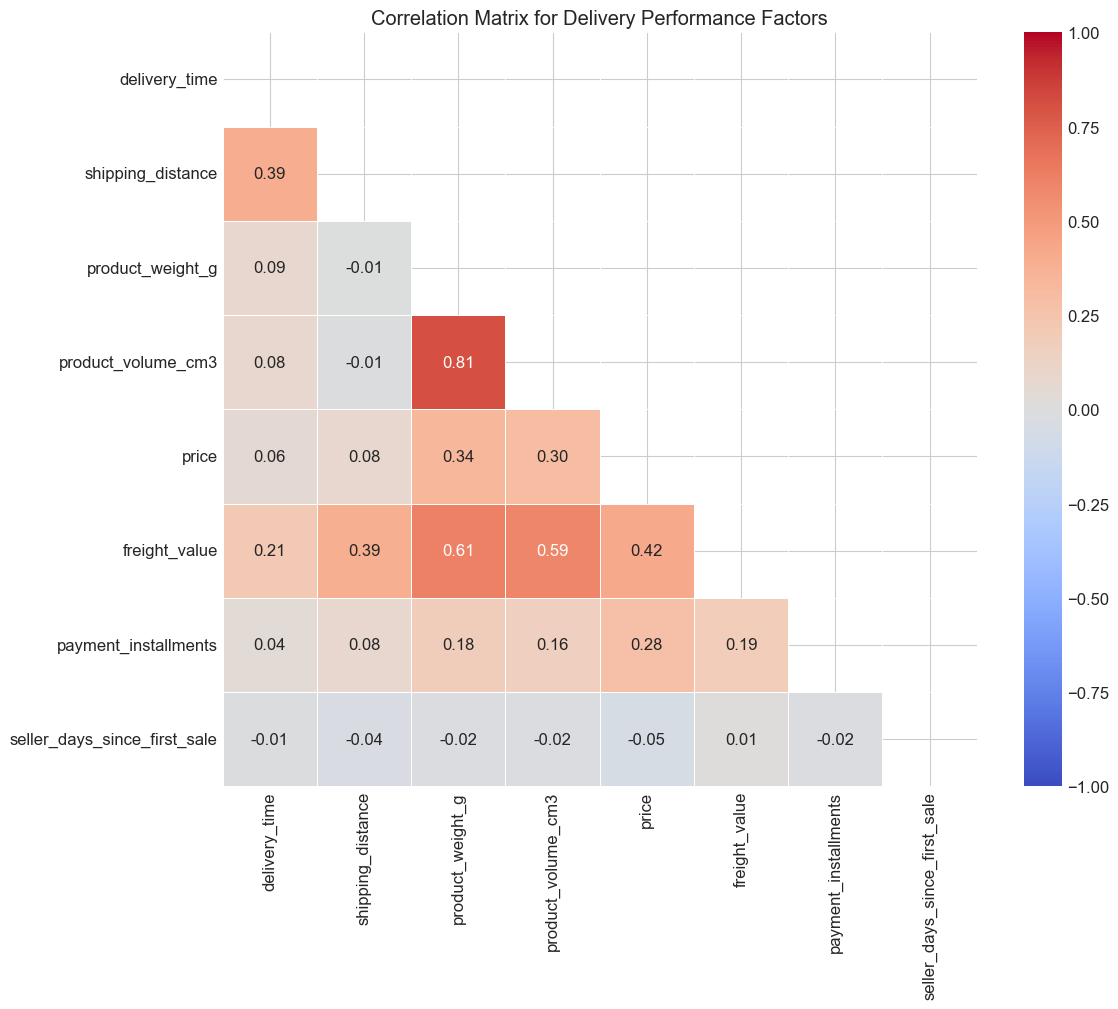

<Figure size 1200x600 with 0 Axes>

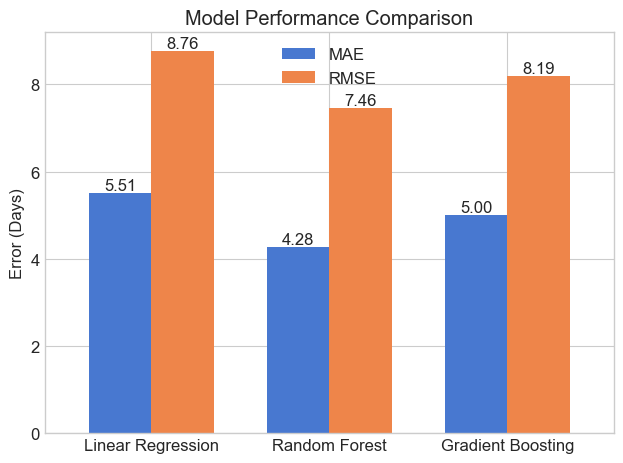

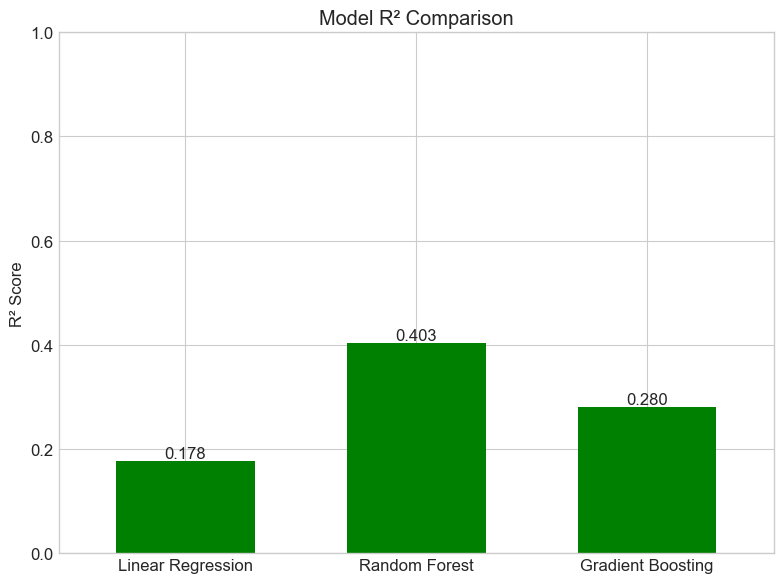

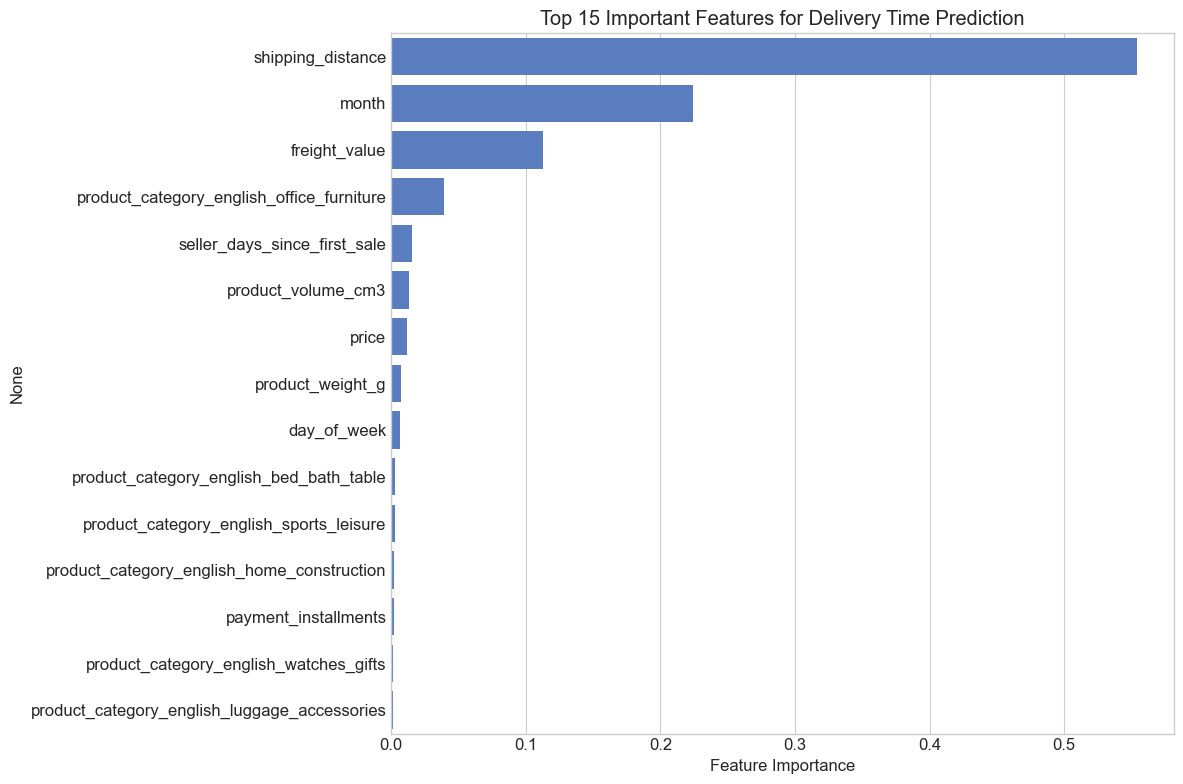

Model Performance Metrics:


,RMSE,MAE,R2
Linear Regression,8.755,5.513,0.178
Random Forest,7.457,4.276,0.403
Gradient Boosting,8.190,5.000,0.280



Top 10 Most Important Features:


,Importance
shipping_distance,0.5539
month,0.2243
freight_value,0.1128
product_category_english_office_furniture,0.0390
seller_days_since_first_sale,0.0157
product_volume_cm3,0.0128
price,0.0116
product_weight_g,0.0069
day_of_week,0.0068
product_category_english_bed_bath_table,0.0028


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
# Plotting the distribution of delivery times with mean and median markers to understand the spread and central tendency
sns.histplot(delivery_df['delivery_time'].dropna(), bins=30, kde=True)
plt.axvline(delivery_df['delivery_time'].mean(), color='r', linestyle='--', 
           label=f'Mean: {delivery_df["delivery_time"].mean():.1f} days')
plt.axvline(delivery_df['delivery_time'].median(), color='g', linestyle='--', 
           label=f'Median: {delivery_df["delivery_time"].median():.1f} days')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('delivery_time_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
delivery_df['distance_bucket'] = pd.cut(
    delivery_df['shipping_distance'], 
    bins=[0, 100, 250, 500, 750, 1000, 1500, 2000, 3000],
    labels=['0-100', '100-250', '250-500', '500-750', '750-1000', '1000-1500', '1500-2000', '2000+']
)
distance_delivery = delivery_df.groupby('distance_bucket')['delivery_time'].mean()
ax = sns.barplot(x=distance_delivery.index, y=distance_delivery.values)
plt.title('Average Delivery Time by Shipping Distance')
plt.xlabel('Shipping Distance (km)')
plt.ylabel('Average Delivery Time (Days)')
for i, v in enumerate(distance_delivery.values):
    ax.text(i, v + 0.2, f'{v:.1f}', ha='center')
plt.tight_layout()
plt.savefig('distance_vs_delivery.png')
plt.show()

plt.figure(figsize=(10, 6))
# Creating buckets for shipping distance and plotting average delivery time to assess distance's impact
delivery_df['weight_bucket'] = pd.cut(
    delivery_df['product_weight_g'], 
    bins=[0, 500, 1000, 2000, 5000, 10000, 20000, 50000],
    labels=['0-500g', '500g-1kg', '1-2kg', '2-5kg', '5-10kg', '10-20kg', '20kg+']
)
weight_delivery = delivery_df.groupby('weight_bucket')['delivery_time'].mean()
ax = sns.barplot(x=weight_delivery.index, y=weight_delivery.values)
plt.title('Average Delivery Time by Product Weight')
plt.xlabel('Product Weight')
plt.ylabel('Average Delivery Time (Days)')
for i, v in enumerate(weight_delivery.values):
    ax.text(i, v + 0.2, f'{v:.1f}', ha='center')
plt.tight_layout()
plt.savefig('weight_vs_delivery.png')
plt.show()

plt.figure(figsize=(12, 8))
state_delivery = delivery_df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False)
ax = sns.barplot(x=state_delivery.index, y=state_delivery.values)
plt.title('Average Delivery Time by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=90)
for i, v in enumerate(state_delivery.values):
    ax.text(i, v + 0.2, f'{v:.1f}', ha='center')
plt.tight_layout()
plt.savefig('delivery_by_state.png')
plt.show()

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
delivery_df['day_name'] = delivery_df['day_of_week'].map(day_map)
plt.figure(figsize=(10, 6))
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_delivery = delivery_df.groupby('day_name')['delivery_time'].mean()
dow_delivery = dow_delivery.reindex(dow_order)
ax = sns.barplot(x=dow_delivery.index, y=dow_delivery.values)
plt.title('Average Delivery Time by Day of Week')
plt.xlabel('Order Day')
plt.ylabel('Average Delivery Time (Days)')
for i, v in enumerate(dow_delivery.values):
    ax.text(i, v + 0.2, f'{v:.1f}', ha='center')
plt.tight_layout()
plt.savefig('delivery_by_weekday.png')
plt.show()

plt.figure(figsize=(12, 10))
corr_vars = ['delivery_time', 'shipping_distance', 'product_weight_g', 
             'product_volume_cm3', 'price', 'freight_value', 
             'payment_installments', 'seller_days_since_first_sale']
correlation = delivery_df[corr_vars].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix for Delivery Performance Factors')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

if 'product_volume_cm3' not in delivery_df.columns:
    delivery_df['product_volume_cm3'] = delivery_df['product_length_cm'] * delivery_df['product_height_cm'] * delivery_df['product_width_cm']

if 'day_of_week' not in delivery_df.columns:
    delivery_df['order_purchase_datetime'] = pd.to_datetime(delivery_df['order_purchase_timestamp'])
    delivery_df['day_of_week'] = delivery_df['order_purchase_datetime'].dt.dayofweek
    delivery_df['month'] = delivery_df['order_purchase_datetime'].dt.month

if 'seller_days_since_first_sale' not in delivery_df.columns:
    seller_first_sale = delivery_df.groupby('seller_id')['order_purchase_datetime'].min().reset_index()
    seller_first_sale.columns = ['seller_id', 'first_sale_date']
    delivery_df = pd.merge(delivery_df, seller_first_sale, on='seller_id', how='left')
    delivery_df['seller_days_since_first_sale'] = (delivery_df['order_purchase_datetime'] - delivery_df['first_sale_date']).dt.days

if 'product_category_english' not in delivery_df.columns:
    if 'product_category_name_english' in delivery_df.columns:
        delivery_df['product_category_english'] = delivery_df['product_category_name_english']
    else:
        delivery_df = pd.merge(
            delivery_df,
            product_category_translation.rename(columns={'product_category_name_english': 'product_category_english'}),
            on='product_category_name',
            how='left'
        )

features = ['shipping_distance', 'product_weight_g', 'product_volume_cm3', 
           'price', 'freight_value', 'payment_installments', 'seller_days_since_first_sale',
           'day_of_week', 'month', 'product_category_english']

# Handling missing values: numerical features are filled with median, categorical with mode to retain data integrity
for feature in features:
    if feature in delivery_df.columns and delivery_df[feature].isnull().sum() > 0:
        if delivery_df[feature].dtype.kind in 'ifc':  
            delivery_df[feature].fillna(delivery_df[feature].median(), inplace=True)
        else:  
            delivery_df[feature].fillna(delivery_df[feature].mode()[0], inplace=True)

delivery_df_clean = delivery_df.dropna(subset=features + ['delivery_time'])

X = pd.get_dummies(delivery_df_clean[features], drop_first=True)
y = delivery_df_clean['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
feature_importance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    
    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = pd.Series(
            model.feature_importances_, index=X.columns
        ).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame(results).T
ax = metrics_df[['MAE', 'RMSE']].plot(kind='bar', width=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Error (Days)')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.savefig('model_performance.png')
plt.show()

plt.figure(figsize=(8, 6))
ax = metrics_df['R2'].plot(kind='bar', width=0.6, color='green')
plt.title('Model R² Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
plt.tight_layout()
plt.savefig('model_r2.png')
plt.show()

plt.figure(figsize=(12, 8))
top_features = feature_importance['Gradient Boosting'].head(15)
ax = sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 15 Important Features for Delivery Time Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("Model Performance Metrics:")
display(metrics_df.round(3))

print("\nTop 10 Most Important Features:")
display(top_features.head(10).to_frame('Importance').round(4))